In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

data_x = pd.read_csv("X.csv")
data_y = pd.read_csv("y.csv")


In [31]:
x0 = data_x['0']
x1 = data_x['1']
y = data_y['0']

X = []
Y = []

red = []
blue = []

for i in range(len(y)):
    temp = [x0[i],x1[i]]
    X.append(temp)
    Y.append(y[i])
    if y[i] == 0:
        red.append([x0[i],x1[i]])
    else:
        blue.append([x0[i],x1[i]])
red = np.array(red)
blue = np.array(blue)

X = np.array(X)
Y = np.array(Y)


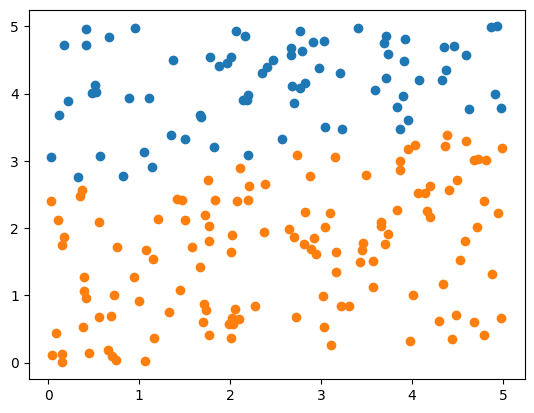

In [27]:
plt.scatter(blue[:,0],blue[:,1])
plt.scatter(red[:,0],red[:,1])

In [35]:
class perceptron():
    def __init__(self,dim):
        self.weights = np.random.rand(dim + 1)
    def activacion(self,suma):
        if suma >= 0:
            return 1
        else:
            return -1
    def error(self,y_predict,y):
        return (1/2)*((y-y_predict)**2)
              
    def entrenamiento(self, x, y,epochs, learning_rate):
        suma = 0
        for i in range(epochs):
            for j in range(len(y)):
                suma = np.dot(x[j,:],self.weights[1:]) + self.weights[0]
                v = self.activacion(suma)
                err = self.error(v,y[j])
                self.weights[1:] += learning_rate * err * x[j,:]
                self.weights[0] += learning_rate * err


In [37]:
neurona = perceptron(2)
neurona.entrenamiento(X,Y,1000,0.01)

print(neurona.weights)

    

[ 625.81153623 1599.46667042 1018.11237586]


[0.7948113  0.50263709]


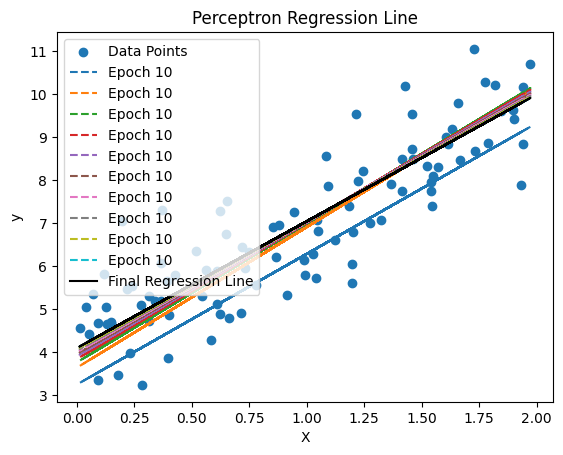

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Perceptron class with a modification for regression-like output
class PerceptronRegression:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.random.rand(input_size + 1)  # +1 for the bias
        print(self.weights)
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.predictions = []

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]  # dot product + bias
        return summation

    def train(self, training_inputs, labels):
        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error
            self.predictions.append([self.weights[0], self.weights[1]])

# Generate some random data for regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Create a perceptron for regression
perceptron_reg = PerceptronRegression(input_size=1, epochs=10, learning_rate=0.01)

# Train the perceptron
perceptron_reg.train(X, y)

# Plot the data points
plt.scatter(X, y, label='Data Points')

# Plot the regression line at different stages during training
for weights in perceptron_reg.predictions:
    plt.plot(X, weights[0] + weights[1] * X, '--', label=f'Epoch {len(perceptron_reg.predictions)}')

# Plot the final regression line
plt.plot(X, perceptron_reg.weights[0] + perceptron_reg.weights[1] * X, 'k-', label='Final Regression Line')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Perceptron Regression Line')
plt.legend()

# Show the plot
plt.show()
